In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


8


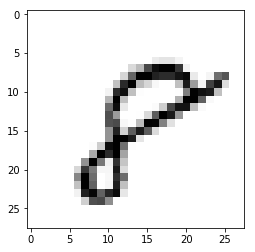

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 59999
print(y_train[image_index])
plt.imshow(x_train[image_index].reshape(28,28), cmap='Greys')



In [3]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Image augmentation
#from keras.preprocessing.image import ImageDataGenerator
#shift = 0.1
#datagen = ImageDataGenerator(rotation_range=20,  width_shift_range=shift, height_shift_range=shift)
#datagen.fit(x_train)
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])



x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:


# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=30)

Epoch 1/35
60000/60000 [==============================] - 17s 280us/step - loss: 0.0193 - acc: 0.9944
Epoch 2/35
60000/60000 [==============================] - 16s 263us/step - loss: 0.0171 - acc: 0.9948
Epoch 3/35
60000/60000 [==============================] - 16s 259us/step - loss: 0.0151 - acc: 0.9953
Epoch 4/35
60000/60000 [==============================] - 16s 260us/step - loss: 0.0148 - acc: 0.9954
Epoch 5/35
60000/60000 [==============================] - 16s 263us/step - loss: 0.0137 - acc: 0.9960
Epoch 6/35
60000/60000 [==============================] - 16s 263us/step - loss: 0.0131 - acc: 0.9956
Epoch 7/35
60000/60000 [==============================] - 16s 261us/step - loss: 0.0109 - acc: 0.9965
Epoch 8/35
60000/60000 [==============================] - 16s 262us/step - loss: 0.0109 - acc: 0.9962
Epoch 9/35
60000/60000 [==============================] - 15s 255us/step - loss: 0.0105 - acc: 0.9966
Epoch 10/35
60000/60000 [==============================] - 15s 255us/step - loss: 

In [7]:
model.save("mnist_cnn.h5")

In [8]:
print(model.evaluate(x_test, y_test))
#print(model.evaluate_generator(datagen.flow(x_test, y_test, batch_size=32), steps=1000))



10000/10000 [==============================] - 1s 107us/step
[0.018155868224142252, 0.9961]


3
(28, 28, 1)


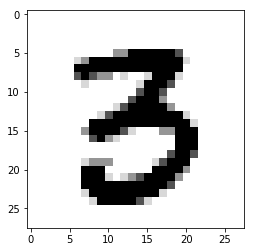

In [9]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(x_test[image_index].shape)

(28, 28, 1)
1


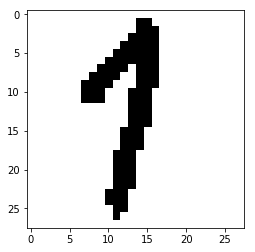

In [11]:
import imageio
import numpy as np

im = imageio.imread('9.png')
im2 = np.empty((28,28,1), dtype='float32')
for i in range(28):
    for j in range(28):
        im2[i][j] = [(255 - (int(im[i][j][0]) + int(im[i][j][1]) + int(im[i][j][2])) / 3) / 255]

print(im2.shape)
plt.imshow(im2.reshape(28, 28),cmap='Greys')
pred = model.predict(im2.reshape(1, 28, 28, 1))
print(pred.argmax())